In [1]:
from large_gcs.contact.contact_location import *
from large_gcs.contact.contact_pair_mode import *
from large_gcs.contact.rigid_body import *
from large_gcs.geometry.polyhedron import Polyhedron
from large_gcs.graph.contact_graph import ContactGraph
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# np.set_printoptions(formatter={"float": lambda x: "{0:0.3f}".format(x)})

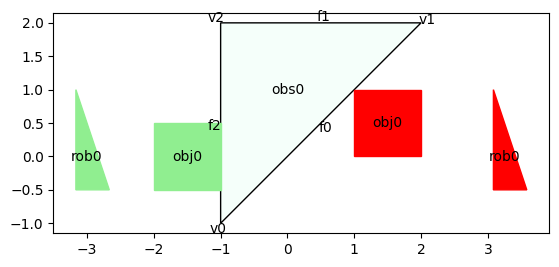

In [2]:
# # 2 items collision free motion planning
# obs_vertices = [
#     np.array([[0, 0], [1, 0], [0, -1]])
# ]
# obj_vertices = [
# ]
# rob_vertices = [
#     np.array([[-1,-1],[-1.5,-0.5],[-1.2, -1.5]])
# ]
# source_obj_pos = []
# source_rob_pos = [[-1, -1]]
# target_obj_pos = []
# target_rob_pos = [[2, 2]]

# # 3 items triangle challenge
obs_vertices = [[[-1, 2], [-1, -1], [2, 2]]]
obj_vertices = [[[1, 0.5], [1, -0.5], [2, -0.5], [2, 0.5]]]
rob_vertices = [[[3, 1.5], [3, 0], [3.5, 0]]]
source_obj_pos = [[1.5, 0.5]]
source_rob_pos = [[3.25, 0]]
target_obj_pos = [[-1.5, 0]]
target_rob_pos = [[-3, 0]]

# # 2 movable items
# obs_vertices = []
# obj_vertices = [np.array([[0, 0], [1, 0], [1, 1], [0, 1]]) + np.array([2.5, 0.5])]
# rob_vertices = [np.array([[-1, -1], [-1.5, -0.5], [-1.2, -1.5]])]
# source_obj_pos = [[0, -0.5]]
# source_rob_pos = [[-2, -2]]
# target_obj_pos = [[1.5, 0]]
# target_rob_pos = [[2.5, 2]]

# 3 items
# obs_vertices = [
#     np.array([[0, 0], [1, 0], [0, -1]])
# ]
# obj_vertices = [
#     np.array([[0, 0], [1, 0], [1, 1], [0,1]]) + np.array([2.5,0.5])
# ]
# rob_vertices = [
#     np.array([[-1,-1],[-1.5,-0.5],[-1.2, -1.5]])
# ]

# # 3 boxes
# obs_vertices = [
#     np.array([[0, 0], [2, 0], [2, 1], [0,1]])
# ]
# obj_vertices = [
#     np.array([[0, 0], [1, 0], [1, 1], [0,1]]) + np.array([2.5,0.5])
# ]
# rob_vertices = [
#     np.array([[0, 0], [0.5, 0], [0.5, 0.5], [0,0.5]]) + np.array([0,-1])
# ]

# # 4 items
# obs_vertices = [
#     np.array([[0, 0], [1, 0], [0, -1]])
# ]
# obj_vertices = [
#     np.array([[0, 0], [1, 0], [1, -0.5]]) + np.array([1.5, 0]),
#     np.array([[0, 0], [1, 0], [1, 1], [0,1]]) + np.array([2.5,0.5])
# ]
# rob_vertices = [
#     np.array([[-1,-1],[-1.5,-0.5],[-1.2, -1.5]])
# ]
obs = []
objs = []
robs = []
n_pos_per_set = 2
for i in range(len(obs_vertices)):
    obs.append(
        RigidBody(
            name=f"obs{i}",
            geometry=Polyhedron.from_vertices(obs_vertices[i]),
            mobility_type=MobilityType.STATIC,
            n_pos_points=n_pos_per_set,
        )
    )
for i in range(len(obj_vertices)):
    objs.append(
        RigidBody(
            name=f"obj{i}",
            geometry=Polyhedron.from_vertices(obj_vertices[i]),
            mobility_type=MobilityType.UNACTUATED,
            n_pos_points=n_pos_per_set,
        )
    )
for i in range(len(rob_vertices)):
    robs.append(
        RigidBody(
            name=f"rob{i}",
            geometry=Polyhedron.from_vertices(rob_vertices[i]),
            mobility_type=MobilityType.ACTUATED,
            n_pos_points=n_pos_per_set,
        )
    )
all_rigid_bodies = obs + objs + robs

# for rigid_body in all_rigid_bodies:
#     rigid_body.plot()
for static_body in obs:
    static_body.plot()
for movable_body, source_pos in zip(objs + robs, source_obj_pos + source_rob_pos):
    movable_body.plot_at_position(source_pos, color="red")
for movable_body, target_pos in zip(objs + robs, target_obj_pos + target_rob_pos):
    movable_body.plot_at_position(target_pos, color="lightgreen")
plt.gca().set_aspect("equal")

In [3]:
ws = 3
contact_graph = ContactGraph(
    obs,
    objs,
    robs,
    source_obj_pos,
    source_rob_pos,
    target_obj_pos,
    target_rob_pos,
    workspace=[[-3.5, 3.5], [-2.5, 2.5]],
    # workspace=[[-ws, ws], [-ws, ws]],
)

print(contact_graph.params)

Generating contact sets for 3 bodies...
Generating contact pair modes for 3 body pairs...


100%|██████████| 3/3 [00:00<00:00, 57.79it/s]


Each body pair has on average 5.0 modes
Generating contact sets for 81 sets...


100%|██████████| 81/81 [00:00<00:00, 489.97it/s]


Pruning empty sets...


100%|██████████| 81/81 [00:01<00:00, 80.96it/s] 

81 sets remain after removing 0 empty sets
Generating edges...(parallel)



100%|██████████| 3403/3403 [00:08<00:00, 406.45it/s]


2458 edges generated
GraphParams(dim=24, n_vertices=83, n_edges=2458, source=[[1.5, 0.5], [3.25, 0]], target=[[-1.5, 0], [-3, 0]], workspace=[[-3.5, 3.5], [-2.5, 2.5]], default_costs_constraints=DefaultGraphCostsConstraints(vertex_costs=[<pydrake.solvers.L2NormCost object at 0x7f19d81913f0>, <pydrake.solvers.QuadraticCost object at 0x7f19ad0c4630>], vertex_constraints=[], edge_costs=[<pydrake.solvers.LinearCost object at 0x7f19af3a2030>], edge_constraints=[<pydrake.solvers.LinearEqualityConstraint object at 0x7f19acfdcaf0>]))


In [4]:
# contact_graph.graphviz()

In [5]:
# sol = contact_graph.solve(use_convex_relaxation=False)
vertex_names, ambient_path = zip(*sol.path)
print(vertex_names)

NameError: name 'sol' is not defined

In [ ]:
contact_sol = contact_graph.contact_spp_sol

In [ ]:
contact_graph.plot_path()

In [ ]:
from IPython.display import HTML

anim = contact_graph.animate_solution()
# save as mp4
# anim.save("animation.mp4")
HTML(anim.to_html5_video())

In [ ]:
vertex_names, ambient_path = zip(*sol.path)
ambient_path = np.array(ambient_path)
contact_graph.cc_factory.uv_vars_all
for i in range(ambient_path.shape[0] - 1):
    for constraint in contact_graph._default_costs_constraints.edge_constraints:
        uv_vals_flattened = np.concatenate(ambient_path[i : i + 2])
        issatisfied = constraint.CheckSatisfied(uv_vals_flattened)
        print(f"constraint is satisfied: {issatisfied}")
    # print(f"vertex: {vertex_names[i]}")
    # print(f"vertex pos: {ambient_path[i]}")
    # print(f"next vertex: {vertex_names[i+1]}")
    # print(f"next vertex pos: {ambient_path[i+1]}")
    print("-------------------")